In [1]:
import pandas as pd
a1 = pd.read_csv('/content/drive/Shareddrives/Jonghan_Park_Projects/(3)condense-seq/H1/H1_NCP_sp_0_1rep_deep_chr1_Ncov.gtab', sep='\t')
b1 = pd.read_csv('/content/drive/Shareddrives/Jonghan_Park_Projects/(3)condense-seq/H1/H1_NCP_sp_8_1rep_deep_chr1_Ncov.gtab', sep='\t')
a2 = pd.read_csv('/content/drive/Shareddrives/Jonghan_Park_Projects/(3)condense-seq/H1/H1_NCP_sp_0_2rep_deep_chr1_Ncov.gtab', sep='\t')
b2 = pd.read_csv('/content/drive/Shareddrives/Jonghan_Park_Projects/(3)condense-seq/H1/H1_NCP_sp_8_2rep_deep_chr1_Ncov.gtab', sep='\t')
data1 = pd.read_csv('/content/drive/Shareddrives/Jonghan_Park_Projects/(3)condense-seq/data/H1_NCP_sp_1rep_deep_chr1_score_table.gtab', sep='\t')

print(len(a1), len(b1))
print(len(a2), len(b2))

from tqdm import tqdm
import numpy as np

# generate list of err & condensability (ans)
err1, ans1 = [], []
for i in tqdm(range(len(a1))):
    if(a1['H1_NCP_sp_0_1rep_deep'][i]*b1['H1_NCP_sp_8_1rep_deep'][i] == 0):
        err1.append(100)
        ans1.append(0)
        continue
    temp = np.sqrt(b1['H1_NCP_sp_8_1rep_deep'][i]/a1['H1_NCP_sp_0_1rep_deep'][i]**2)
    err1.append(temp)
    ans1.append(np.log(a1['H1_NCP_sp_0_1rep_deep'][i]/b1['H1_NCP_sp_8_1rep_deep'][i]))

# in each division either select top 2000 (if there are >20000 data in the group)
# or top 10% (when <20000 data)
idx1 = []
for i in tqdm(np.arange(-5, 10, 0.1)):
    temp = []
    for j in range(len(err1)):
        if(ans1[j] < i or ans1[j] > i+0.1): continue
        temp.append((err1[j], j))
    if(len(temp) == 0): continue
    temp = sorted(temp, key=lambda x:x[0])
    if(len(temp) > 20000):
        idx1 += [temp[_][1] for _ in range(2000)]
    else:
        idx1 += [temp[_][1] for _ in range(len(temp)//10)]
print(len(idx1))

from tqdm import tqdm
import numpy as np

# generate list of err & condensability (ans)
err2, ans2 = [], []
for i in tqdm(range(len(a2))):
    if(a2['H1_NCP_sp_0_2rep_deep'][i]*b2['H1_NCP_sp_8_2rep_deep'][i] == 0):
        err2.append(100)
        ans2.append(0)
        continue
    temp = np.sqrt(b2['H1_NCP_sp_8_2rep_deep'][i]/a2['H1_NCP_sp_0_2rep_deep'][i]**2)
    err2.append(temp)
    ans2.append(np.log(a2['H1_NCP_sp_0_2rep_deep'][i]/b2['H1_NCP_sp_8_2rep_deep'][i]))

# in each division either select top 2000 (if there are >20000 data in the group)
# or top 10% (when <20000 data)
idx2 = []
for i in tqdm(np.arange(-5, 10, 0.1)):
    temp = []
    for j in range(len(err1)):
        if(ans2[j] < i or ans2[j] > i+0.1): continue
        temp.append((err2[j], j))
    if(len(temp) == 0): continue
    temp = sorted(temp, key=lambda x:x[0])
    if(len(temp) > 20000):
        idx2 += [temp[_][1] for _ in range(2000)]
    else:
        idx2 += [temp[_][1] for _ in range(len(temp)//10)]
print(len(idx2))

idx1check = [0 for i in range(len(a1))]
idx2check = [0 for i in range(len(a2))]
for i in idx1:
    idx1check[i] = 1
for i in idx2:
    idx2check[i] = 1
print(sum(idx1check), sum(idx2check))

import numpy as np

thres, diff = 0.02, 36
rep1, rep2 = [], []

pos = 0
from tqdm import tqdm
for i in tqdm(range(len(a1))):
    while(a1['Position'][i]-diff > a2['Position'][pos]): pos += 1
    if(np.abs(a1['Position'][i]-a2['Position'][pos]) >= diff): continue
    if(idx1check[i] == 0 or idx2check[pos] == 0): continue
    rep1.append(ans1[i])
    rep2.append(ans2[pos])

1521325 1521325
1538381 1538381


100%|██████████| 150/150 [01:01<00:00,  2.44it/s]


53903


100%|██████████| 150/150 [01:04<00:00,  2.33it/s]


52608
53903 52608


100%|██████████| 1521325/1521325 [01:13<00:00, 20694.54it/s]


14715 14715
PearsonRResult(statistic=0.9512498398040004, pvalue=0.0)


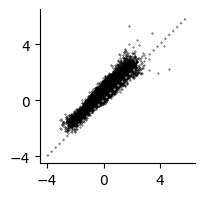

In [2]:
import scipy
print(len(rep1), len(rep2))
print(scipy.stats.pearsonr(rep1, rep2))

import matplotlib.pyplot as plt
plt.figure(figsize=(2, 2))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.scatter(rep1, rep2, c='k', s=0.1)
_ = plt.xticks([-4, 0, 4])
_ = plt.yticks([-4, 0, 4])

plt.plot([-4, 6], [-4, 6], c='gray', linestyle=':')

plt.savefig('./fig2.png', format='png', dpi=1200, transparent=True)

100%|██████████| 1521325/1521325 [00:36<00:00, 41755.95it/s]


PearsonRResult(statistic=0.12054862407952151, pvalue=0.0)


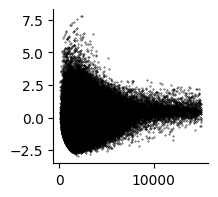

In [ ]:
thres = 0.1
x, y = [], []
for i in tqdm(range(len(a1))):
    if(a1['H1_NCP_sp_0_1rep_deep'][i]==0 or a1['H1_NCP_sp_0_1rep_deep'][i]>15000): continue
    if(err1[i] > thres): continue
    x.append(a1['H1_NCP_sp_0_1rep_deep'][i])
    y.append(ans1[i])

print(scipy.stats.pearsonr(x, y))

plt.figure(figsize=(2, 2))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.scatter(x, y, c='k', s=0.1)

100%|██████████| 1521325/1521325 [00:37<00:00, 40504.67it/s]


PearsonRResult(statistic=0.07651885258056584, pvalue=0.0)


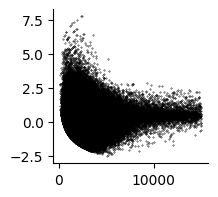

In [ ]:
thres = 0.05
x, y = [], []
for i in tqdm(range(len(a1))):
    if(a1['H1_NCP_sp_0_1rep_deep'][i]==0 or a1['H1_NCP_sp_0_1rep_deep'][i]>15000): continue
    if(err1[i] > thres): continue
    x.append(a1['H1_NCP_sp_0_1rep_deep'][i])
    y.append(ans1[i])

print(scipy.stats.pearsonr(x, y))

plt.figure(figsize=(2, 2))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.scatter(x, y, c='k', s=0.1)

100%|██████████| 1521325/1521325 [00:31<00:00, 49064.59it/s]


PearsonRResult(statistic=0.09191580309600934, pvalue=0.0)


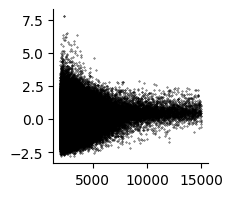

In [ ]:
thres = 0.1
x, y = [], []
for i in tqdm(range(len(a1))):
    if(a1['H1_NCP_sp_0_1rep_deep'][i]<2000 or a1['H1_NCP_sp_0_1rep_deep'][i]>15000): continue
    if(err1[i] > thres): continue
    x.append(a1['H1_NCP_sp_0_1rep_deep'][i])
    y.append(ans1[i])

print(scipy.stats.pearsonr(x, y))

plt.figure(figsize=(2, 2))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.scatter(x, y, c='k', s=0.1)

# model training

In [3]:
import re
def is_valid_dna_sequence(sequence):
    pattern = re.compile("^[atgcATGC]+$")
    return bool(pattern.match(sequence))

S, C = [], []
Q = []
from tqdm import tqdm
for i in tqdm(range(len(data1))):
    if(idx1check[i] == 0): continue
    if(a1['H1_NCP_sp_0_1rep_deep'][i] > 15000): continue
    if(is_valid_dna_sequence(data1['Sequence'][i]) == False): continue
    S.append(data1['Sequence'][i])
    C.append(ans1[i])
    Q.append(list(data1.loc[i,'ATcontent':]))
C = np.array(C)
print(C.shape)

100%|██████████| 1521325/1521325 [00:14<00:00, 108498.69it/s]

(51983,)


In [4]:
def one_hot(base):
    return np.array({'a':[1,0,0,0], 't':[0,1,0,0], 'g':[0,0,1,0], 'c':[0,0,0,1]}[base.lower()])

def Hot(seq):
    seq_one_hot = np.zeros((len(seq)*4, ))
    for i in range(len(seq)): seq_one_hot[4*i : 4*i+4] = one_hot(seq[i])
    return seq_one_hot

input = []
for i in tqdm(range(len(Q))):
    input.append(np.array(Q[i]))
input = np.array(input)
print(input.shape)

100%|██████████| 51983/51983 [00:00<00:00, 247885.90it/s]

(51983, 34)


In [5]:
from sklearn.model_selection import train_test_split

sample_size = input.shape[0] # number of samples in train set
time_steps  = input.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number
re_input = input.reshape(sample_size,time_steps,input_dimension)

x_train, x_test, y_train, y_test = train_test_split(re_input, np.array(C), test_size=0.1)

In [6]:
print(x_train.shape, y_train.shape)

(46784, 34, 1) (46784,)


In [7]:
from xgboost import plot_importance
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5)
xgb.fit(x_train.reshape(-1, 34), y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [8]:
xgb_pred = xgb.predict(x_test.reshape(-1, 34))
import scipy
print(scipy.stats.pearsonr(y_test, xgb_pred))
print(len(y_test))

PearsonRResult(statistic=0.8156737399091238, pvalue=0.0)
5199


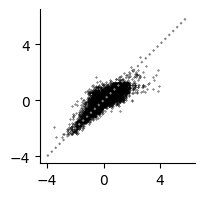

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(2, 2))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.scatter(y_test, xgb_pred, c='k', s=0.1)
_ = plt.xticks([-4, 0, 4])
_ = plt.yticks([-4, 0, 4])

plt.plot([-4, 6], [-4, 6], c='gray', linestyle=':')
plt.savefig('./fig3.png', format='png', dpi=1200, transparent=True)

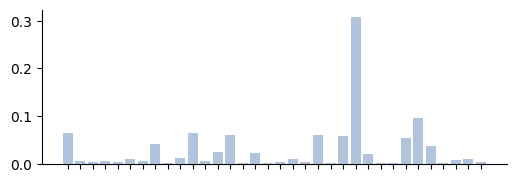

In [11]:
imp = list(xgb.get_booster().get_score(importance_type="gain").values())
imp = np.array(imp)/sum(imp)

plt.figure(figsize=(6, 2))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.bar(range(len(imp)), imp, facecolor='lightsteelblue')
_ = plt.xticks(range(len(imp)), visible=False)

plt.savefig('./fig4.svg', format='svg', dpi=1200, transparent=True)